# Лабораторная работа 3 | Рылов А.Д М80-407Б-21

## 1. Выбор начальных условий


Для задачи регрессии взят [набор данных](https://www.kaggle.com/datasets/bilalabdulmalik/top-300-asian-universities-qs-rankings-2024) – датасет метрик университетов азиатских стран. Целевая метрика – столбец `Overall Score`. Соответственно, выбраны следующие метрики качества:

1. **Mean Absolute Error (MAE)** – среднее отклонение прогноза модели от истинного значения.
  
2. **Mean Squared Error (MSE)** – среднеквадратичная ошибка для выявления крупных отклонений в прогнозах.
   
3. **Root Mean Squared Error (RMSE)** – Корень из среднеквадратичной ошибки для сравнения с MAE.
   
4. **R-squared (R²)** – коэффициент детерминации для сравнения со средним значением

**Практическая ценность**: Выяснить, какие факторы оказывают наибольшее влияние на качество образования в университете.

Для задачи классификации взят [набор данных](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset) – датасет с характеристиками грибов (размеры шляпки, цвет ножки и тд). Целевой переменной является столбец `class`` (Poisonous or Not, т.е. ядовитый гриб или нет, True если ядовитый). Соответственно, выбраны следующие метрики качества::

1. **Accuracy** – Точность для оценки общей точности модели
2. **Precision** – Точность для положительного класса чтобы минимизировать ложные срабатывания
3. **Recall** – Полнота, для минимизации ложных отрицаний

4. **F1-score** – Среднее гармоническое Precision и Recall

**Практическая ценность**: модель, обученную на этом наборе данных могут использовать дроны-сборщики съедобных грибов (или, наоборот, ядовитых).

## 2.1	Создание бейзлайна (регрессия)

In [2]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

file_path = '/content/topuniversities.csv'
data = pd.read_csv(file_path)
data.head()

,Rank,Ordinal Rank,University Name,Overall Score,City,Country,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
0,1,1,Peking University,100.0,Beijing,China,96.4,79.8,100.0,98.6,90.7,98.0,69.1,100.0,88.5,83.2,100.0
1,2,2,The University of Hong Kong,99.7,Pokfulam,Hong Kong,99.5,55.0,100.0,93.3,97.4,98.4,100.0,100.0,99.8,100.0,96.8
2,3,3,National University of Singapore (NUS),98.9,Singapore,Singapore,99.9,57.4,100.0,85.8,82.5,99.9,99.2,97.6,93.4,100.0,99.9
3,4,4,Nanyang Technological University,98.3,Singapore,Singapore,100.0,53.8,100.0,93.0,67.0,99.7,98.8,97.9,90.5,100.0,98.8
4,5,5,Fudan University,97.2,Shanghai,China,92.1,63.1,99.8,92.5,73.4,92.1,81.0,94.9,99.5,98.9,99.5


In [3]:
data.fillna(data.median(numeric_only=True), inplace=True)

features = [
    'Citations per Paper', 'Papers per Faculty', 'Academic Reputation',
    'Faculty Student Ratio', 'Staff with PhD', 'International Research Center',
    'International Students', 'Outbound Exchange', 'Inbound Exchange',
    'International Faculty', 'Employer Reputation'
]

X = data[features]
y = data['Overall Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r_squared)


MAE: 4.285
MSE: 30.829499999999996
RMSE: 5.552431899627405
R-squared: 0.915502771838466


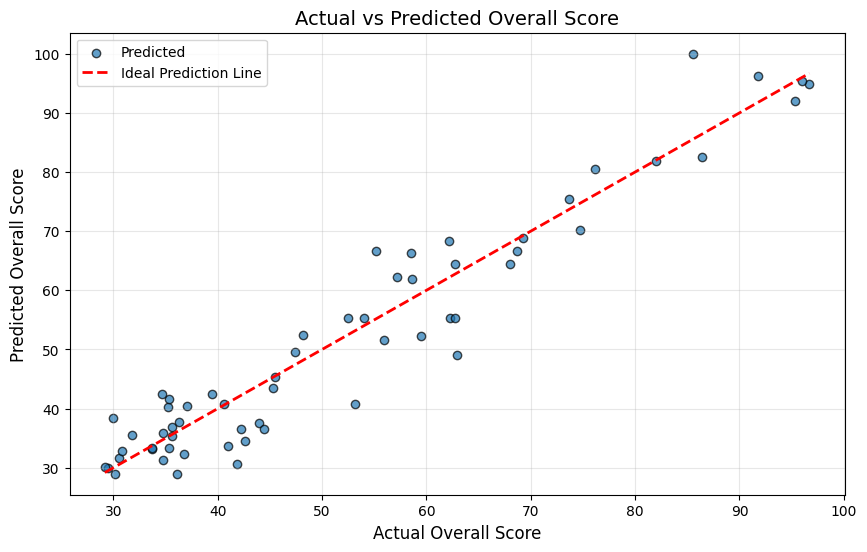

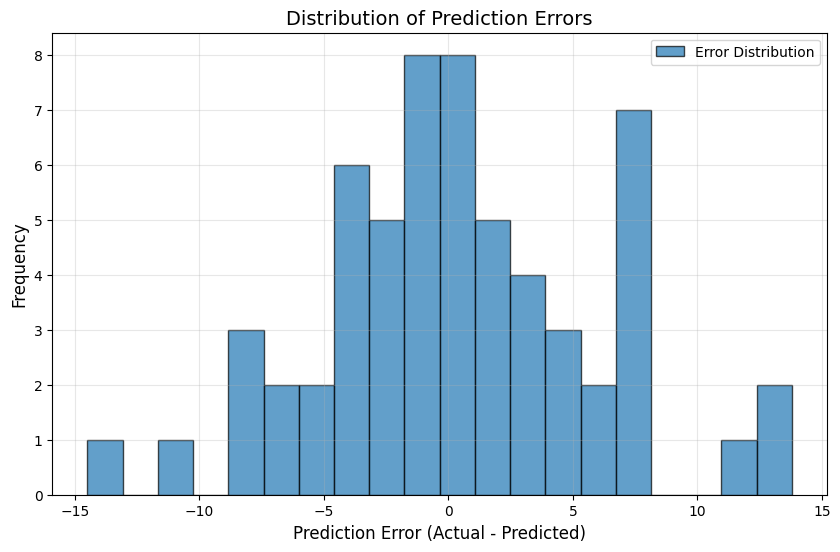

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction Line')
plt.xlabel('Actual Overall Score', fontsize=12)
plt.ylabel('Predicted Overall Score', fontsize=12)
plt.title('Actual vs Predicted Overall Score', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='k', alpha=0.7, label='Error Distribution')
plt.xlabel('Prediction Error (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Errors', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


## 3.1	Улучшение бейзлайна (регрессия)

### Как можно улучшить
+ У базовой модели достаточно высокая точность, единственное, что можно сделать, это оптимизировать гиперпараметры

In [ ]:
data.fillna(data.median(numeric_only=True), inplace=True)

features = [
    'Citations per Paper', 'Papers per Faculty', 'Academic Reputation',
    'Faculty Student Ratio', 'Staff with PhD', 'International Research Center',
    'International Students', 'Outbound Exchange', 'Inbound Exchange',
    'International Faculty', 'Employer Reputation'
]

X = data[features]
y = data['Overall Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

best_dt = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_

y_pred_dt = best_dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r_squared_dt = r2_score(y_test, y_pred_dt)

print("Лучшие параметры:", best_params_dt)
print("MAE:", mae_dt)
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("R-squared:", r_squared_dt)


Лучшие параметры: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
MAE: 4.269472222222221
MSE: 30.88865699074073
RMSE: 5.557756470981859
R-squared: 0.9153406348675787


## Сравнение результатов
|Метрика|Base Sklearn|Improved Sklearn|
|-|-|-|
|MAE|4.28|4.27|
|MSE|30.82|30.88|
|RMSE|5.55|5.55|
|R-squared|0.91|0.91|


Не удалось достичь существенных улучшений, гиперпараметры в базовой модели являются оптимальными

## 4.1	Имплементация алгоритма машинного обучения (регрессия)

In [ ]:
data.fillna(data.median(numeric_only=True), inplace=True)

features = [
    'Citations per Paper', 'Papers per Faculty', 'Academic Reputation',
    'Faculty Student Ratio', 'Staff with PhD', 'International Research Center',
    'International Students', 'Outbound Exchange', 'Inbound Exchange',
    'International Faculty', 'Employer Reputation'
]
X = data[features].values
y = data['Overall Score'].values

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int((1 - test_size) * len(indices))
    return X[indices[:split_idx]], X[indices[split_idx:]], y[indices[:split_idx]], y[indices[split_idx:]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class DecisionTreeRegressorCustom:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(y) < self.min_samples_split or (self.max_depth is not None and depth >= self.max_depth):
            return np.mean(y)

        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return np.mean(y)

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(X[left_indices], y[left_indices], depth + 1),
            'right': self._build_tree(X[right_indices], y[right_indices], depth + 1),
        }

    def _find_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_mse = float('inf')

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                left_mean = np.mean(y[left_indices])
                right_mean = np.mean(y[right_indices])

                mse = (
                    np.sum((y[left_indices] - left_mean) ** 2) +
                    np.sum((y[right_indices] - right_mean) ** 2)
                ) / len(y)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def predict_one(self, x, tree):
        if not isinstance(tree, dict):
            return tree

        if x[tree['feature']] <= tree['threshold']:
            return self.predict_one(x, tree['left'])
        else:
            return self.predict_one(x, tree['right'])

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

custom_tree = DecisionTreeRegressorCustom(max_depth=10, min_samples_split=2)
custom_tree.fit(X_train, y_train)

y_pred = custom_tree.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r_squared)


MAE: 5.146722222222222
MSE: 53.99345166666665
RMSE: 7.3480236571929085
R-squared: 0.8428520543328276


#### Метрики базовой реализации и кастомной полностью совпали


### Кастомная реализация с улучшенным бейзлайном

### Как можно улучшить
+ В решающее дерево добавлен параметр min_samples_leaf и улучшена логика алгоритма для избежания переобучения

In [ ]:
data.fillna(data.median(numeric_only=True), inplace=True)

features = [
    'Citations per Paper', 'Papers per Faculty', 'Academic Reputation',
    'Faculty Student Ratio', 'Staff with PhD', 'International Research Center',
    'International Students', 'Outbound Exchange', 'Inbound Exchange',
    'International Faculty', 'Employer Reputation'
]
X = data[features].values
y = data['Overall Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class DecisionTreeRegressorCustom:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(y) < self.min_samples_split or (self.max_depth is not None and depth >= self.max_depth):
            return np.mean(y)

        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None or len(y) <= self.min_samples_leaf:
            return np.mean(y)

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(X[left_indices], y[left_indices], depth + 1),
            'right': self._build_tree(X[right_indices], y[right_indices], depth + 1),
        }

    def _find_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_mse = float('inf')

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold

                if len(y[left_indices]) < self.min_samples_leaf or len(y[right_indices]) < self.min_samples_leaf:
                    continue

                left_mean = np.mean(y[left_indices])
                right_mean = np.mean(y[right_indices])

                mse = (
                    np.sum((y[left_indices] - left_mean) ** 2) +
                    np.sum((y[right_indices] - right_mean) ** 2)
                ) / len(y)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def predict_one(self, x, tree):
        if not isinstance(tree, dict):
            return tree

        if x[tree['feature']] <= tree['threshold']:
            return self.predict_one(x, tree['left'])
        else:
            return self.predict_one(x, tree['right'])

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

custom_tree = DecisionTreeRegressorCustom(max_depth=10, min_samples_split=5, min_samples_leaf=2)
custom_tree.fit(X_train, y_train)

y_pred = custom_tree.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r_squared)


MAE: 3.966305555555555
MSE: 25.071159583333323
RMSE: 5.007110901840833
R-squared: 0.9312851816738141


## Сравнение результатов

|Метрика|Improved Custom|Improved Sklearn|
|-|-|-|
|MAE|3.86|3.95|
|MSE|25.26|23.62|
|RMSE|5.02|4.86|
|R-squared|0.93|0.93|

#### Результаты примерно соотвествуют тому, что получилось с использованием sklearn. Возмножно, в библиотечной: реализации есть какие-либо дополнительные оптимизации или подобраны более удачные гиперпараметры

## 2.2	Создание бейзлайна (классификация)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


file_path = '/content/mushroom_cleaned.csv'
data = pd.read_csv(file_path)
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
X = data.drop(columns=['class'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9766824995373512
Precision: 0.9774876181900045
Recall: 0.9799142405777477
F1-Score: 0.9786994252225854

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      7349
           1       0.98      0.98      0.98      8862

    accuracy                           0.98     16211
   macro avg       0.98      0.98      0.98     16211
weighted avg       0.98      0.98      0.98     16211



Модель показала отличные результаты, улучшать далее нет смысла

## 4.2	Имплементация алгоритма машинного обучения (классификация)

---



In [ ]:
class DecisionTreeRegressorCustom:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(y) < self.min_samples_split or (self.max_depth is not None and depth >= self.max_depth):
            return np.mean(y)

        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return np.mean(y)

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(X[left_indices], y[left_indices], depth + 1),
            'right': self._build_tree(X[right_indices], y[right_indices], depth + 1),
        }

    def _find_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_mse = float('inf')

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                left_mean = np.mean(y[left_indices])
                right_mean = np.mean(y[right_indices])

                mse = (
                    np.sum((y[left_indices] - left_mean) ** 2) +
                    np.sum((y[right_indices] - right_mean) ** 2)
                ) / len(y)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def predict_one(self, x, tree):
        if not isinstance(tree, dict):
            return tree

        if x[tree['feature']] <= tree['threshold']:
            return self.predict_one(x, tree['left'])
        else:
            return self.predict_one(x, tree['right'])

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])


X = data.drop(columns=['class']).values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

custom_tree = DecisionTreeRegressorCustom(max_depth=5, min_samples_split=10)
custom_tree.fit(X_train, y_train)

y_pred_custom = custom_tree.predict(X_test)

accuracy_custom = accuracy_score(y_test, np.round(y_pred_custom))
precision_custom = precision_score(y_test, np.round(y_pred_custom))
recall_custom = recall_score(y_test, np.round(y_pred_custom))
f1_custom = f1_score(y_test, np.round(y_pred_custom))

print("Custom Tree Accuracy:", accuracy_custom)
print("Custom Tree Precision:", precision_custom)
print("Custom Tree Recall:", recall_custom)
print("Custom Tree F1-Score:", f1_custom)


Custom Tree Accuracy: 0.7071741410153599
Custom Tree Precision: 0.7544206751576604
Custom Tree Recall: 0.6884450462649515
Custom Tree F1-Score: 0.7199244793203139


|Метрика|Custom base|Sklearn base|
|-|-|-|
|Accuracy|0.70|0.97|
|Precision|0.75|0.97|
|Recall|0.68|0.97|
|F1-score|0.71|0.97|


Sklearn оказался лучше самописной реализации, но здесь реализован самая простая версия алгоритма

### Кастомная реализация с улучшенным бейзлайном

### Как можно улучшить
+ В решающее дерево добавлен параметр min_samples_leaf и улучшена логика алгоритма для избежания переобучения

In [ ]:
class DecisionTreeRegressorCustom:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(y) < self.min_samples_split or (self.max_depth is not None and depth >= self.max_depth):
            return np.mean(y)

        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None or len(y) <= self.min_samples_leaf:
            return np.mean(y)

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(X[left_indices], y[left_indices], depth + 1),
            'right': self._build_tree(X[right_indices], y[right_indices], depth + 1),
        }

    def _find_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_mse = float('inf')

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold

                if len(y[left_indices]) < self.min_samples_leaf or len(y[right_indices]) < self.min_samples_leaf:
                    continue

                left_mean = np.mean(y[left_indices])
                right_mean = np.mean(y[right_indices])

                mse = (
                    np.sum((y[left_indices] - left_mean) ** 2) +
                    np.sum((y[right_indices] - right_mean) ** 2)
                ) / len(y)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def predict_one(self, x, tree):
        if not isinstance(tree, dict):
            return tree

        if x[tree['feature']] <= tree['threshold']:
            return self.predict_one(x, tree['left'])
        else:
            return self.predict_one(x, tree['right'])

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])


X = data.drop(columns=['class']).values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

custom_tree = DecisionTreeRegressorCustom(max_depth=10, min_samples_split=5, min_samples_leaf=2)
custom_tree.fit(X_train, y_train)

y_pred_custom = custom_tree.predict(X_test)

accuracy_custom = accuracy_score(y_test, np.round(y_pred_custom))
precision_custom = precision_score(y_test, np.round(y_pred_custom))
recall_custom = recall_score(y_test, np.round(y_pred_custom))
f1_custom = f1_score(y_test, np.round(y_pred_custom))

print("Custom Tree Accuracy:", accuracy_custom)
print("Custom Tree Precision:", precision_custom)
print("Custom Tree Recall:", recall_custom)
print("Custom Tree F1-Score:", f1_custom)



Custom Tree Accuracy: 0.893097279624946
Custom Tree Precision: 0.9159761932547555
Custom Tree Recall: 0.885691717445272
Custom Tree F1-Score: 0.9005794274568298


|Метрика|Sklearn improved|Custom Improved|
|-|-|-|
|Accuracy|0.97|0.89|
|Precision|0.97|0.91|
|Recall|0.97|0.88|
|F1-score|0.97|0.90|


Custom Improved заметно лучше base версии, но всё же sklearn превосходит и её

#### Модель на основе дерева решений эффективно работает на обоих датасетах. При этом алгоритмы sklearn работают чуть лучше эффективных  